In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import models, layers

In [3]:
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE=512
BATCH_SIZE=32
CHANNELS=3
EPOCHS=60

image_dataset_from_directory is bulid in function used to load images from folder

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "tumor",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE), 
    batch_size=BATCH_SIZE,
)

Found 3264 files belonging to 4 classes.


Classes names

In [6]:
class_names=dataset.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [7]:
len(dataset)

102

In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy)

(32, 512, 512, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 0, 1, 1, 1, 0, 3, 3, 3, 1, 3, 3, 1, 0, 0, 1, 2, 2, 0, 3, 3,
       2, 3, 0, 3, 2, 1, 0, 0, 0, 3])>>


In [9]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(512, 512, 3), dtype=float32)


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


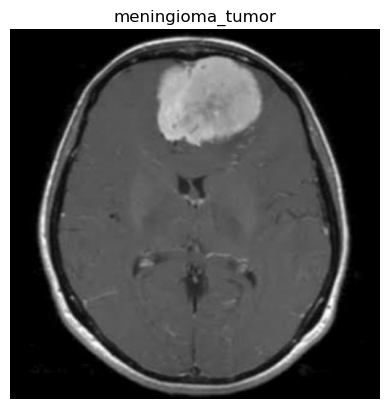

In [10]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

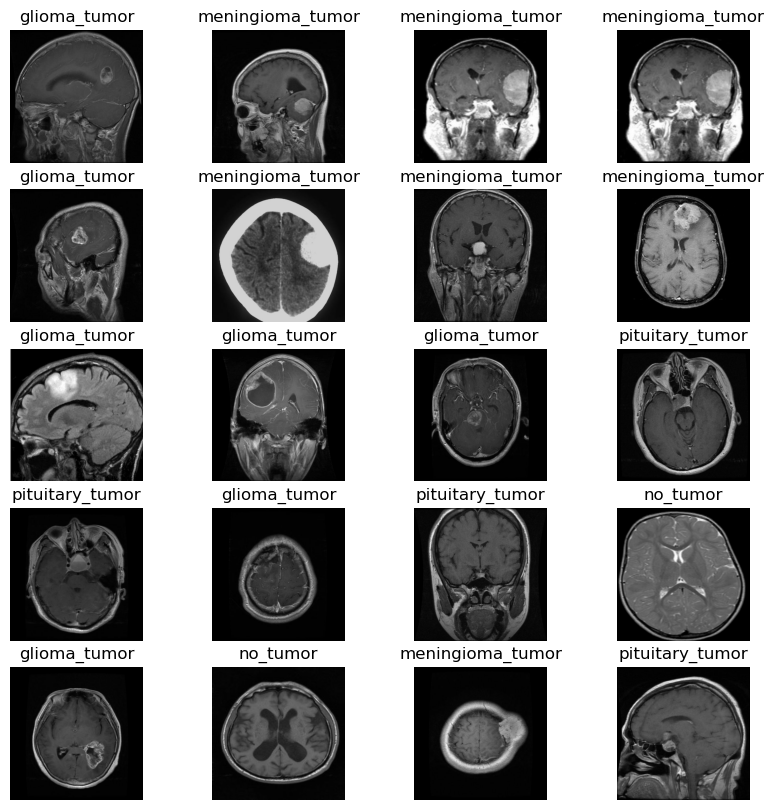

In [11]:
plt.figure(figsize=(10, 10))
for image_batch,label_batch in dataset.take(1):
    for i in range(20):
        ax=plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

### tranning  - 80%, validation - 10%, testing - 10%

In [12]:
train_size=0.8
len(dataset)*train_size

81.60000000000001

In [13]:
train_ds=dataset.take(81)

In [14]:
len(train_ds)

81

In [15]:
remaining_ds=dataset.skip(81)

In [16]:
val_size=0.1
len(dataset)*val_size

10.200000000000001

In [17]:
val_ds=remaining_ds.take(10)
len(val_ds)

10

In [18]:
test_ds=remaining_ds.skip(10)
len(test_ds)

11

In [19]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle :
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [20]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

81

In [22]:
len(val_ds)

10

In [23]:
len(test_ds)

11

In [24]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# PREPROCESSING

In [25]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

# Augmentation

In [26]:
data_augmentation=tf.keras.Sequential([
   layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
   layers.experimental.preprocessing.RandomRotation(0.2),
])

# Build Model

In [27]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=4
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(n_classes,activation="softmax")
])
model.build(input_shape=input_shape)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 512, 512, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 512, 512, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 510, 510, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 255, 255, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 253, 253, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 126, 126, 64)       0         
 2D)                                                  

In [29]:
model.compile(
optimizer="adam",
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [30]:
history=model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds)

Epoch 1/60
81/81 [==============================] - 1069s 12s/step - loss: 1.2850 - accuracy: 0.3912 - val_loss: 1.0818 - val_accuracy: 0.5281
Epoch 2/60
81/81 [==============================] - 770s 9s/step - loss: 1.1470 - accuracy: 0.5089 - val_loss: 0.9351 - val_accuracy: 0.6000
Epoch 3/60
81/81 [==============================] - 758s 9s/step - loss: 0.9944 - accuracy: 0.5876 - val_loss: 0.8379 - val_accuracy: 0.6781
Epoch 4/60
81/81 [==============================] - 741s 9s/step - loss: 0.9062 - accuracy: 0.6123 - val_loss: 0.7352 - val_accuracy: 0.7406
Epoch 5/60
81/81 [==============================] - 772s 9s/step - loss: 0.8522 - accuracy: 0.6443 - val_loss: 0.7540 - val_accuracy: 0.7063
Epoch 6/60
81/81 [==============================] - 739s 9s/step - loss: 0.8056 - accuracy: 0.6674 - val_loss: 0.7310 - val_accuracy: 0.6781
Epoch 7/60
81/81 [==============================] - 741s 9s/step - loss: 0.7381 - accuracy: 0.7037 - val_loss: 0.7377 - val_accuracy: 0.6906
Epoch 8/60


Epoch 59/60
81/81 [==============================] - 764s 9s/step - loss: 0.1586 - accuracy: 0.9383 - val_loss: 0.1949 - val_accuracy: 0.9438
Epoch 60/60
81/81 [==============================] - 730s 9s/step - loss: 0.1462 - accuracy: 0.9506 - val_loss: 0.1973 - val_accuracy: 0.9563


In [31]:
score=model.evaluate(test_ds)

11/11 [==============================] - 69s 2s/step - loss: 0.2296 - accuracy: 0.9290


In [32]:
history

In [33]:
print(history.params)

{'verbose': 1, 'epochs': 60, 'steps': 81}


In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [35]:
history.history['accuracy']

[0.39120370149612427,
 0.508873462677002,
 0.5875771641731262,
 0.6122685074806213,
 0.6442901492118835,
 0.667438268661499,
 0.7037037014961243,
 0.7017747163772583,
 0.7364969253540039,
 0.758873462677002,
 0.7546296119689941,
 0.7820215821266174,
 0.7966821193695068,
 0.8070987462997437,
 0.8198302388191223,
 0.8360339403152466,
 0.8429784178733826,
 0.841821014881134,
 0.8503086566925049,
 0.8657407164573669,
 0.8668981194496155,
 0.8672839403152466,
 0.8854166865348816,
 0.8695987462997437,
 0.8908178806304932,
 0.875,
 0.8931326866149902,
 0.8935185074806213,
 0.9089506268501282,
 0.8969907164573669,
 0.9070215821266174,
 0.9054784178733826,
 0.9020061492919922,
 0.9162808656692505,
 0.9124228358268738,
 0.9162808656692505,
 0.9220678806304932,
 0.9197530746459961,
 0.9158950448036194,
 0.9320987462997437,
 0.9201388955116272,
 0.9278549551963806,
 0.9259259104728699,
 0.9378858208656311,
 0.9066358208656311,
 0.9282407164573669,
 0.9266975522041321,
 0.9317129850387573,
 0.93055

In [36]:
len(history.history['accuracy'])

60

In [37]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Losses')

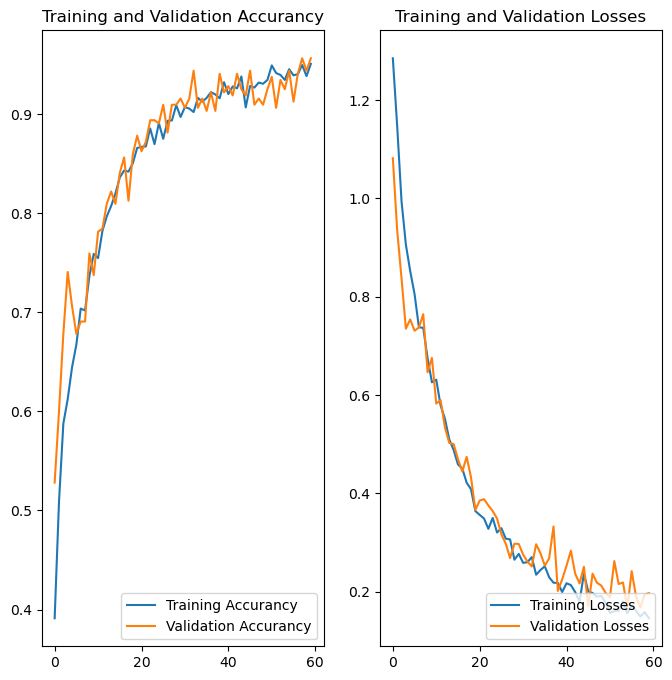

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accurancy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accurancy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accurancy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Losses')
plt.plot(range(EPOCHS),val_loss,label='Validation Losses')
plt.legend(loc='lower right')
plt.title('Training and Validation Losses')

Frist Image to Predicat
first Image actual label meningioma_tumor
1/1 [==============================] - 2s 2s/step
first Image predicated label glioma_tumor


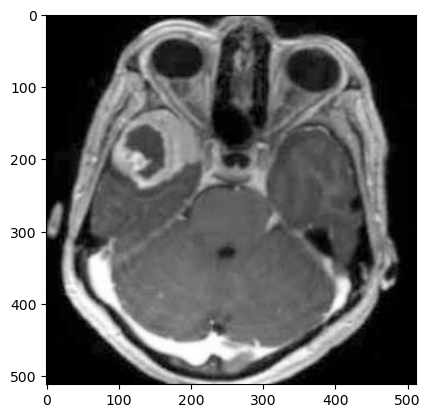

In [39]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print('Frist Image to Predicat')
    plt.imshow(first_image)
    print('first Image actual label',class_names[first_label])
    
    batch_predication=model.predict(images_batch)
    print('first Image predicated label',class_names[np.argmax(batch_predication[0])])

In [40]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,axis=0)
    
    
    predications=model.predict(img_array)
    
    predicated_class=class_names[np.argmax(predications[0])]
    confidence=round(100*(np.max(predications[0])),2)
    return predicated_class,confidence

1/1 [==============================] - 0s 112ms/step


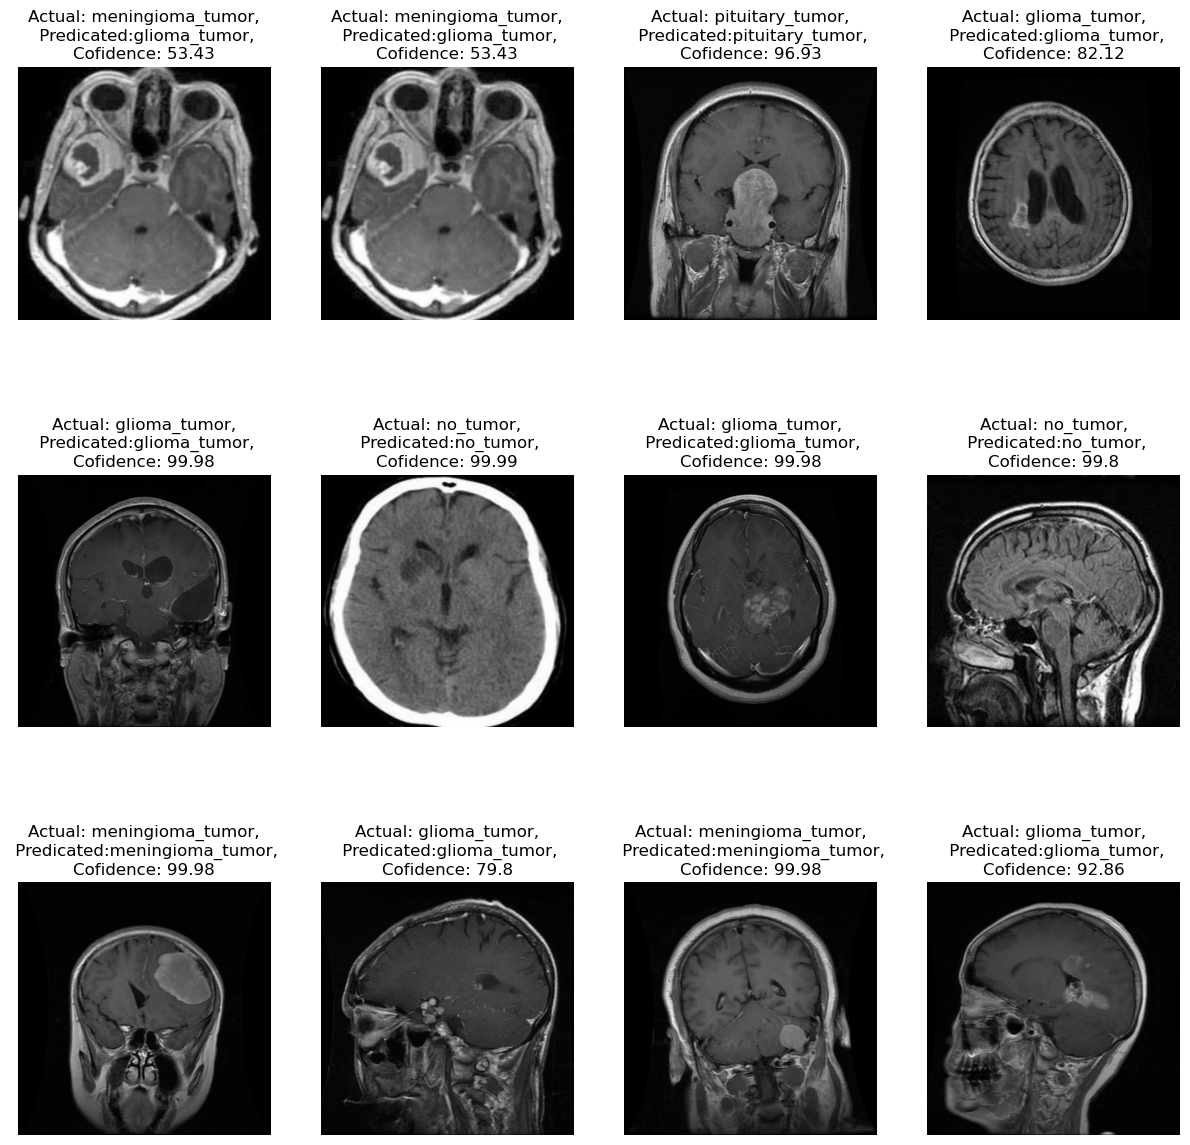

In [41]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        actual_class=class_names[labels[i]]
        predication,confidence=predict(model,images[i].numpy())
        plt.title(f"Actual: {actual_class},\n Predicated:{predication},\nCofidence: {confidence}" )
        plt.axis('Off')

In [42]:
import os

In [44]:
model_version=max([int(i) for i in os.listdir('models')])+1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/6\assets


INFO:tensorflow:Assets written to: models/6\assets


In [45]:
model.save(f"models/braintumor.h5")